In [1]:
print("Hello World!")

Hello World!


this is going to summarize a bunch of resources. For now:
* https://www.w3schools.com/python/default.asp
* [Kylie Ying - Introduction to Programming](https://www.youtube.com/watch?v=GGdmIL85qos&list=PLkWv3oO4kHnsiGHnifBxa79d-xPwYDiAx&index=1)

In [2]:
import urllib
import json
from IPython.display import display, Markdown

def generate_toc(notebook_path, indent_char="&emsp;"):
    is_markdown = lambda it: "markdown" == it["cell_type"]
    is_title = lambda it: it.strip().startswith("#") and it.strip().lstrip("#").lstrip()
    
    # Load the notebook JSON
    with open(notebook_path, 'r', encoding='utf-8') as in_f: # Use 'utf-8-sig' if necessary
        nb_json = json.load(in_f)
    
    toc_lines = []
    for cell in filter(is_markdown, nb_json["cells"]):
        for line in filter(is_title, cell["source"]):
            line = line.strip()
            indent = indent_char * (line.index(" ") - 1)
            title = line.lstrip("#").lstrip()
            url = urllib.parse.quote(title.replace(" ", "-"))
            out_line = f"{indent}[{title}](#{url})<br>\n"
            toc_lines.append(out_line)
    
    # Join the lines into a single string
    toc_output = ''.join(toc_lines)
    
    # Display the TOC in the Jupyter notebook cell
    display(Markdown(toc_output))

# Call the function with the path to your notebook
generate_toc('python.ipynb')

[installing python](#installing-python)<br>
[IDEs](#IDEs)<br>
[dependencies management](#dependencies-management)<br>
[virtual environments](#virtual-environments)<br>
[version control](#version-control)<br>
[variables <a name="variables"></a>](#variables-%3Ca-name%3D%22variables%22%3E%3C/a%3E)<br>
&emsp;[naming conventions](#naming-conventions)<br>
&emsp;[data structures <a name="data-types"></a>](#data-structures-%3Ca-name%3D%22data-types%22%3E%3C/a%3E)<br>
&emsp;&emsp;[Numeric](#Numeric)<br>
&emsp;&emsp;[Boolean](#Boolean)<br>
&emsp;&emsp;[Sequence types](#Sequence-types)<br>
&emsp;&emsp;&emsp;[Strings](#Strings)<br>
&emsp;&emsp;&emsp;[Range sequences](#Range-sequences)<br>
&emsp;&emsp;&emsp;[Lists](#Lists)<br>
&emsp;&emsp;&emsp;[Tuple](#Tuple)<br>
&emsp;&emsp;[Set types](#Set-types)<br>
&emsp;&emsp;[Mapping types](#Mapping-types)<br>
&emsp;&emsp;&emsp;[Dictionaries](#Dictionaries)<br>
&emsp;&emsp;[Other object types](#Other-object-types)<br>
&emsp;&emsp;[classes and objects](#classes-and-objects)<br>
&emsp;[Operators <a name="operators"></a>](#Operators-%3Ca-name%3D%22operators%22%3E%3C/a%3E)<br>
[conditions](#conditions)<br>
[loops](#loops)<br>
[functions](#functions)<br>
[user input](#user-input)<br>
[installing packages](#installing-packages)<br>
[file and directory access](#file-and-directory-access)<br>
[regular expressions](#regular-expressions)<br>


# installing python

* `Anaconda` distribution

    https://www.anaconda.com/download
* Miniconda

    minimal installer for conda
    https://docs.anaconda.com/miniconda/
    
* just python

    https://www.python.org/

You use the CPython interpreter like this

`python --version`

`python myscript.py`

https://github.com/python/cpython

https://docs.python.org/3.14/using/cmdline.html

# REPLs and IDEs

* [Rob Mulla - Jupyter Notebook Complete Beginner Guide](https://www.youtube.com/watch?v=5pf0_bpNbkw)

**REPLs**

* the CPython interpreter in interactive mode

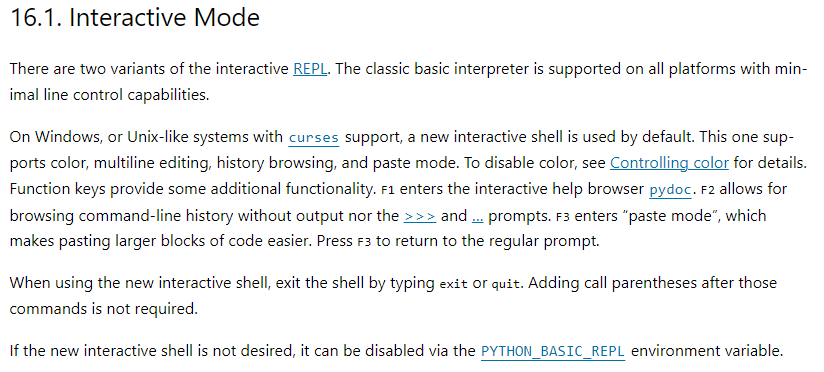

* `IPython` (Interactive Python) console

    type `ipython` to start it

    https://ipython.org/

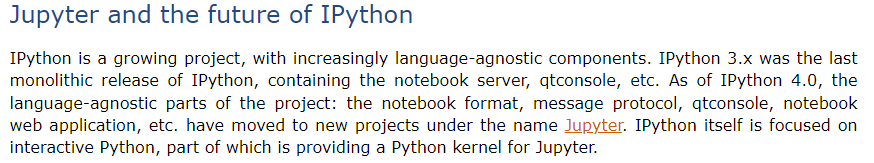

**IDEs**
* `IDLE`

    comes with every Python distribution; noone uses it

* `VSCode`

    https://code.visualstudio.com/
* `Jupyter notebooks`
    
    https://jupyter.org/
    
    The Jupyter Notebook is the original web application for creating and sharing computational documents.
    
* `JupyterLab`
    
    JupyterLab is the latest web-based interactive development environment for notebooks, code, and data

get information about the interpreter by using the `sys` module

https://docs.python.org/3/library/sys.html

In [2]:
import sys

In [ ]:
help(sys)

In [4]:
sys.version
# A string containing the version number of the Python interpreter plus additional information
# on the build number and compiler used.
# Do not extract version information out of it, rather, use version_info and the functions provided by the platform module.

'3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]'

In [5]:
sys.version_info
# A tuple containing the five components of the version number: major, minor, micro, releaselevel, and serial. 
# All values except releaselevel are integers; the release level is 'alpha', 'beta', 'candidate', or 'final'.

sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)

In [6]:
if sys.version_info.major != 3:
    raise Exception('Version problem', 'this assumes python 3')
else:
    print("using python v3")

using python v3


not very useful in here because the kernel which is running also shows the version (top right corner)

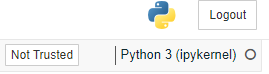

In [ ]:
sys.platform
# This string contains a platform identifier that can be used to append platform-specific components to sys.path, for instance.
# The platform module provides detailed checks for the system’s identity.

'win32'

In [8]:
if sys.platform.startswith('freebsd'):
    # FreeBSD-specific code here...
    pass
elif sys.platform.startswith('linux'):
    # Linux-specific code here...
    pass
elif sys.platform.startswith('aix'):
    # AIX-specific code here...
    pass
elif sys.platform == 'win32':
    print("On Windows")
elif sys.platform == 'darwin':
    print("On a Mac")
elif sys.platform == 'cygwin':
    print("Windows/Cygwin")
else:
    print("IDK")

In [9]:
sys.executable
# A string giving the absolute path of the executable binary for the Python interpreter, on systems where this makes sense.

'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\python.exe'

In [10]:
sys.path
# A list of strings that specifies the search path for modules. 
# Initialized from the environment variable PYTHONPATH, plus an installation-dependent default.

['D:\\repos\\python-jupyter',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310',
 '',
 'C:\\Users\\ricga\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin']

**shebang**

a shebang is the character sequence #!, consisting of the characters number sign (also known as sharp or hash) and exclamation mark (also known as bang), at the beginning of a script.

When a text file with a shebang is used as if it were an executable in a Unix-like operating system, the program loader mechanism parses the rest of the file's initial line as an interpreter directive. The loader executes the specified interpreter program, passing to it as an argument the path that was initially used when attempting to run the script, so that the program may use the file as input data. For example, if a script is named with the path path/to/script, and it starts with the line #!/bin/sh, then the program loader is instructed to run the program /bin/sh, passing path/to/script as the first argument.

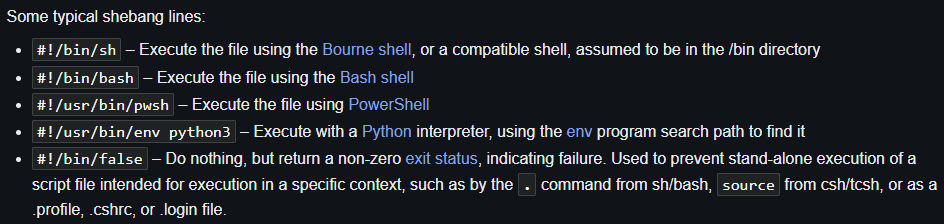

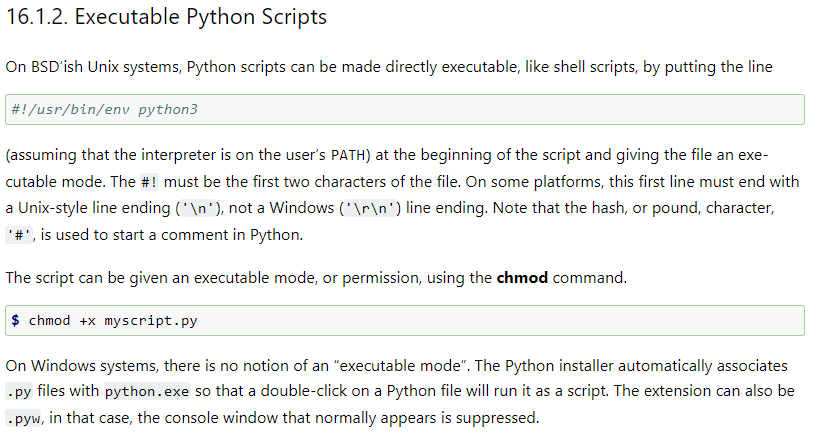

# dependencies management

**using requirements.txt**

    package1==1.0.0
    package2>=2.0.0

**using a setup.py file**

    from setuptools import setup, find_packages

    setup(
        name='your_package',
        version='1.0.0',
        packages=find_packages(),
        install_requires=[
            'package1==1.0.0',
            'package2>=2.0.0',
        ],
        python_requires='>=3.0',
    )

**using a pyproject.toml file**

    [build-system]
    requires = ["setuptools>=42", "wheel"]
    build-backend = "setuptools.build_meta"

    [project]
    name = "your_package"
    version = "1.0.0"
    dependencies = [
        "package1==1.0.0",
        "package2>=2.0.0",
    ]
    requires-python = ">=3.0"

**using Poetry**

https://github.com/python-poetry/poetry

# virtual environments

**without using a virtual environment**

install python and the dependencies

run a file

`python 0.py`

**using a virtual environment**

- create a virtual environment

    `python -m venv venv`

    this creates a virtual environment called venv using the venv module. -m stands for module

    It adds a venv directory to the project

- make sure you are using the right interpreter

    (the one in `.\venv\Scripts\python.exe`)

- activate the virtual environment. 

    This depends on the shell you are using

    If you are using Git Bash,

    `source venv/Scripts/activate`

    The name of the virtual environment (venv) should appear before the shell prompt

- install dependencies

    `pip install -r requirements.txt`

    -r stands for recursive

- deactivate the virtual environment

    `deactivate`

# version control

**Git**

In [11]:
# TODO

**Github**

In [12]:
# TODO

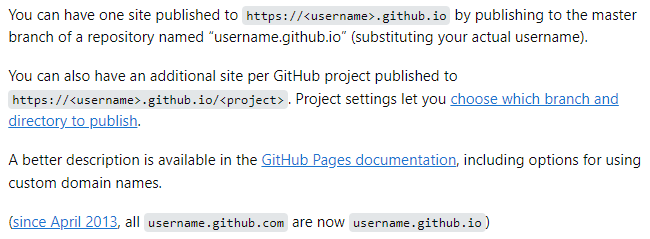

# variables <a name="variables"></a>

**Comments**

In [13]:
# This is a comment. No code is executed

In [14]:
print("Hello, World!") #This is a comment

Hello, World!


In [15]:
#This is a comment
#written in
#more than just one line
print("Hello, World!")

Hello, World!


Since Python will ignore string literals that are not assigned to a variable, you can add a multiline string (triple quotes) in your code, and place your comment inside it:

In [16]:
"""
This is a comment
written in
more than just one line
"""
print("Hello, World!")

Hello, World!


**Defining and printing vars**

In [17]:
x = 22

print(x)

22


In [18]:
type(x)

int

In [19]:
x = 22

x # in jupyter notebooks, the output of the last statement in each code cell is printed

22

In [20]:
my_name = "Ricardo Abreu"

my_name

'Ricardo Abreu'

In [21]:
type(my_name)

str

In [22]:
x, y, z = 'Choco', 'Vanilla', 'Berry'

print(x)
print(y)
print(z)

Choco
Vanilla
Berry


In [23]:
x = y = z = 'Choco'

print(x)
print(y)
print(z)

Choco
Choco
Choco


In [24]:
x, y, z = 'Choco', 'Vanilla', 'Berry'
icecream = [x, y, z]

print(icecream)

['Choco', 'Vanilla', 'Berry']


In [25]:
type(icecream)

list

In [26]:
a, b, c = icecream

print(a)
print(b)
print(c)

Choco
Vanilla
Berry


## naming conventions

First of all, they should be in english. If you don't know how to say something or are unsure, you look it up and learn in the process. Besides, now there's the AI and you can ask it what to rename it to and to do it for you.

**Camel case**

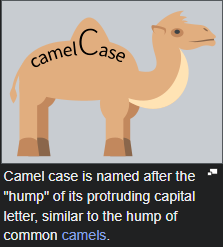

In [3]:
# Camel case
testVariableCase = 'Ric' # Words are delimited by capital letters, except the initial word

**Pascal case**

In [4]:
# Pascal case
TestVariableCase = 'Ric' # Words are delimited by capital letters

**Snake case**

In [5]:
# Snake case
test_variable_case = 'Ric' # Words are delimited by an underscore

**Hungarian notation**

https://en.wikipedia.org/wiki/Hungarian_notation

In [6]:
# Hungarian notation
# This notation describes the variable type or purpose at the start of the variable name, 
# followed by a descriptor that indicates the variable's function. The Camelcase notation is used to delimit words.
stestVariableCase = 'Ric'


arrDistributeGroup = [] # Array called "Distribute Group"
sUserName = '' # String called "User Name"
iRandomSeed = 0 # Integer called "Random Seed"
bBusy = True # Boolean called "Busy"

**PEP**

https://peps.python.org/pep-0008/

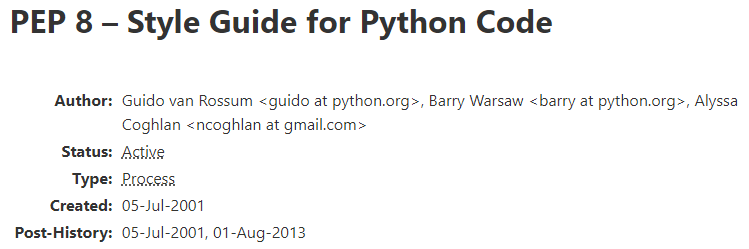

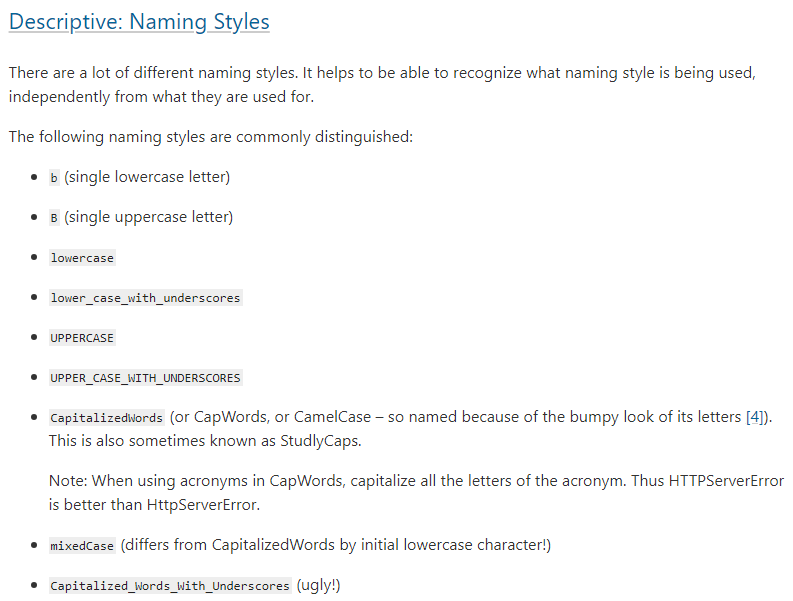

Python and Ruby both recommend `UpperCamelCase` for class names, `CAPITALIZED_WITH_UNDERSCORES` for constants, and `snake_case` for other names.

In Python, if a name is intended to be `"private"`, it is prefixed by one or two underscores. Private variables are enforced in Python only by convention. Names can also be suffixed with an underscore to prevent conflict with Python keywords. 

Prefixing with double underscores changes behaviour in classes with regard to name mangling. Prefixing and suffixing with double underscores - the so-called `"dunder" ("double under") methods` in Python - are reserved for "magic names" which fulfill special behaviour in Python objects.

## data structures <a name="data-types"></a>

A `data structure` is a specialized format for organizing, managing, and storing data in a computer so that it can be accessed and modified efficiently. It defines the relationships among data elements and the operations that can be performed on them. The implementation of a data structure in a programming language depends on how data is organized and managed in the computer's `memory`

<div>
    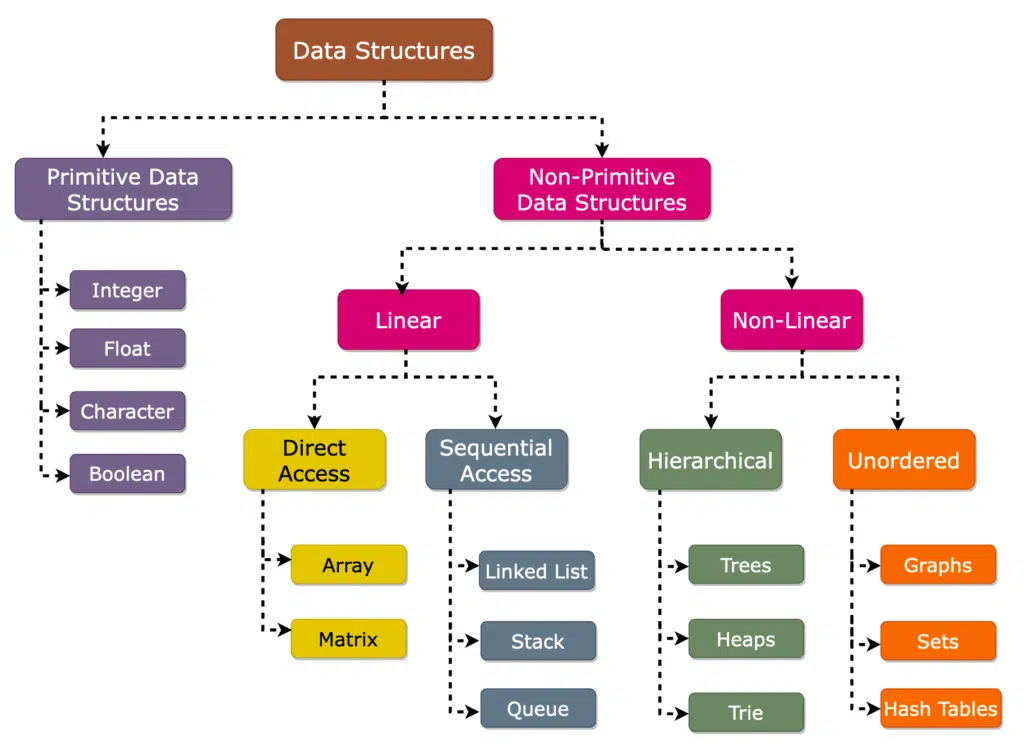
</div>

* primitive vs non-primitive
    * This classification differentiates between `basic data types` provided by the language (`primitive`) and more `complex data structures` built using these types (`non-primitive`).

    * eg.

        primitive: Integers, Floats, Booleans, Characters,...

        non-primitive: Arrays, Lists, Stacks, Queues, Trees, Graphs, Hash Tables
     * Python implements several primitive `numeric data types` but doesn't have a primitive `character type`. To store characters it uses a non-primitive sequence type `string`

* built-in data structures
    
    `built-in` data structures are integral parts of the Python language, available by default without the need for importing any modules. They are the ones in the `standard type hierarchy` below. They include:

    * numeric types
        * real numbers (floating-point numbers, `floats`)
        * `complex numbers`
        * integral types
            * integer numbers (`integers`)
            * binary numbers (`booleans`)

     * sequence types
         * `strings` (text)
         * `lists`
         * `tuples`
         * `ranges`
         * `bytes`
         * `byte arrays`

  * set types
      * `sets`
      * `frozen sets`
  * mapping types
      * `dictionaries`
  * callable types
      * functions
  * modules

<div>
    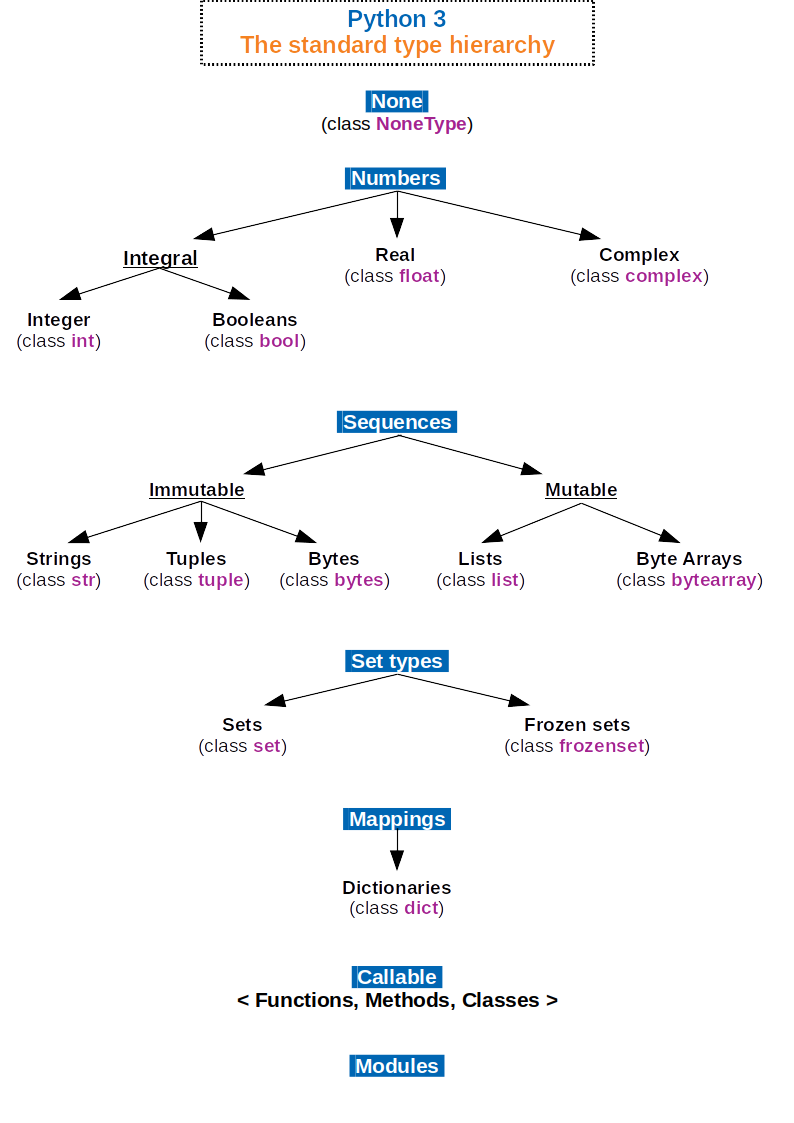
</div>

* `Python Standard Library` data structures

    is a collection of modules and packages included with Python that provides additional functionality beyond the built-in data structures.
    * `collections` module. Some of them:
        * `deque`: double-ended queue, optimized for fast appends and pops from both ends
        * `namedtuple`: creating tuple subclasses with named fields
        * `defaultdict`: alternative to built-in dictionaries
    * `heapq` module - implements a heap queue, also known as a priority queue
        * `heapq`
    * `array` module - implements an array data structure that is more space-efficient than lists
        * `array`
    * `bisect` module - provides utilities for operations on sorted lists
    * `queue` module - implements multi-producer, multi-consumer queues suitable for threading
        * `Queue`: FIFO queue
        * `LifoQueue`: Last-In-First-Out queue (stack)
        * `PriorityQueue`: queue where entries are kept sorted and retrieved in priority order

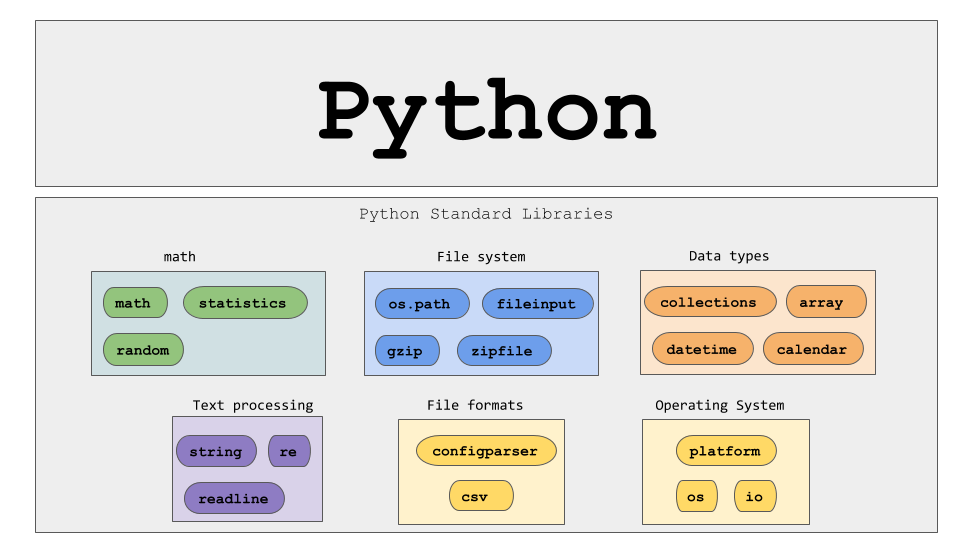

* third-party data structures
    
    Third-party libraries are are developed and maintained by the Python community and can be installed via `package managers` like `pip`. All libraries create their own data structures and algorithms, and many rely themselves on other third-party libraries
    * NumPy (`numpy`)
        * `ndarray`: N-dimensional array object for efficient numerical computations

    * Pandas (`pandas`)
        * `DataFrame`: 2-dimensional labeled data structure (aka a table with columns of any data type)
        * `Series`: 1-dimensional labeled array capable of holding any data type

    * NteworkX (`networkx`) - implements structures representing different types of graphs (undirected, directed, with multiple edges)
        * `Graph`
        * `DiGraph`
        * `MultiGraph`
        * `MultiDiGraph`

    * SortedContainers (`sortedcontainers`) - implements sorted versions of python's built-in types
        * `SortedList`
        * `SortedDict`
        * `SortedSet`

    * SciPy (`scipy`) - optimization, integration, interpolation, eigenvalue problems, algebraic equations, and more
        * sparse matrices (`scipy.sparse`): efficient storage formats for large, sparse matrices (matrices predominantly filled with zeros)
        * spatial data structures (`scipy.spatial`)
            * distance matrices (`scipy.spatial.distance`): structures that store pairwise distances between a set of points
            * KD-trees (`KDTree`), Ball trees (`BallTree`)

    * Sympy (`sympy`) - symbolic mathematics
        * symbolic expressions (`sympy.Expr`)
            * symbols (`symbols`): variables or constants in expressions
        * matrices (`sympy.Matrix`): symbolic matrix
        * polynomials (`sympy.Poly`)
        * operators
            * functions (`sympy.Function`)
            * derivatives (`sympy.Derivative`)
            * integrals (`sympy.integrals`)

    * scikit-learn (`sklearn`) - machine learning
        * estimators: classes like `Classifier`, `Regressor`
        * pipelines (`sklearn.pipeline.Pipeline`): sequentially applies a list of transforms and a final estimator, streamlining workflows
        * structures for handling feature names and labels: `sklearn.feature_extraction`, `sklearn.preprocessing`

    * TensorFlow (`tensorflow as tf`)
        * tensors (`tf.Tensor`): multi-dimensional arrays with a uniform type
        * variables (`tf.Variable`): tensors whose values can be changed during execution, typically used to store model parameters
        * datasets (`tf.data.Dataset`): high-level API for building complex input pipelines
        * graphs (`tf.Graph`): used in tf 1.x to define operations
        * layers and models (`tf.keras.layers`, `tf.keras.Model`)

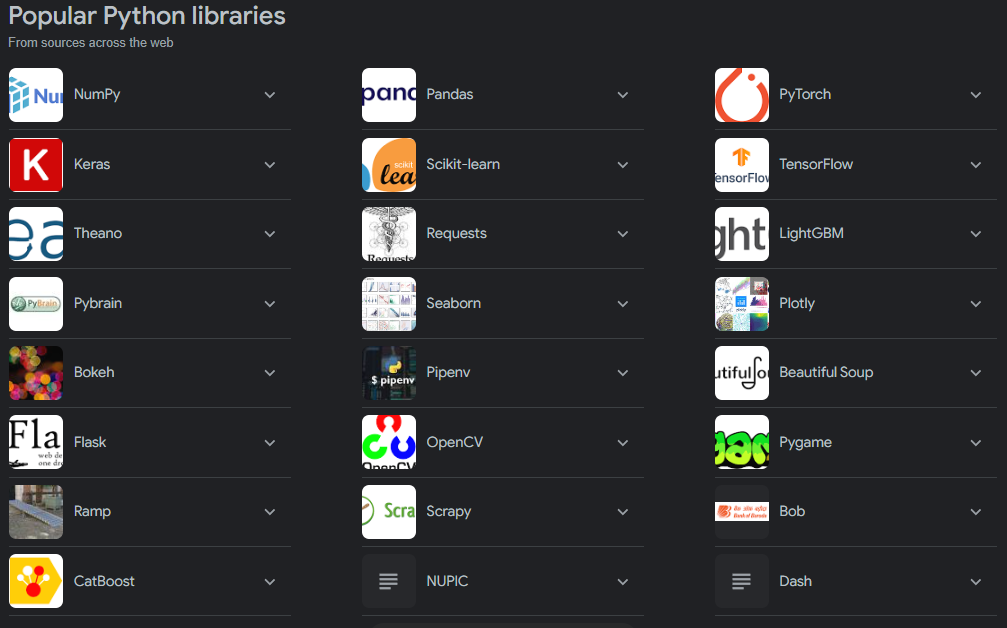

* https://github.com/vinta/awesome-python
* https://github.com/ml-tooling/best-of-ml-python

### Numeric

In [186]:
c = 10  # integer
print("c = 10 belongs to type:", type(c), "\n")  # <class 'int'>

c = 10 belongs to type: <class 'int'> 



In [30]:
type(-12 + 100)

int

In [31]:
type(0.55)

float

There are three distinct numeric types: integers, floating point numbers, and complex numbers. In addition, Booleans are a subtype of integers. Integers have unlimited precision. Floating point numbers are usually implemented using double in C; information about the precision and internal representation of floating point numbers for the machine on which your program is running is available in sys.float_info. Complex numbers have a real and imaginary part, which are each a floating point number. To extract these parts from a complex number z, use z.real and z.imag. (The standard library includes the additional numeric types fractions.Fraction, for rationals, and decimal.Decimal, for floating-point numbers with user-definable precision.)

Numbers are created by numeric literals or as the result of built-in functions and operators. Unadorned integer literals (including hex, octal and binary numbers) yield integers. Numeric literals containing a decimal point or an exponent sign yield floating point numbers. Appending 'j' or 'J' to a numeric literal yields an imaginary number (a complex number with a zero real part) which you can add to an integer or float to get a complex number with real and imaginary parts.

The constructors int(), float(), and complex() can be used to produce numbers of a specific type.

All numeric types (except complex) support the following operations (for priorities of the operations, see Operator precedence)
- addition `x + y`, sum of x and y
- subtraction `x − y`, difference of x and y
- multiplication `x ∗ y`, product of x and y
- division/quotient `x / y`, quotient of x and y
- integer division `x // y`, floored quotient of x and y
- module `x % y`, remainder of `x / y`
- negation `-x`, x negated
- `+x`, x unchanged
- absolute value or magnitude of x, `abs(x)`
- `complex(re, im)`, a complex number with real part re, imaginary part im. im defaults to zero.
- `c.conjugate()`, conjugate of the complex number c
- `divmod(x, y)`, the pair `(x // y, x % y)`
- exponentiation `pow(x, y)` or `x ∗∗ y`, x to the power y
- `int(x)`, x converted to integer
- `float(x)`, x converted to floating point

In [188]:
a = 0.00007  # float defined using decimal notation
a

7e-05

In [189]:
# 1.64 * 10^(-4)
b = 1.64e-4  # float defined using scientific notation
b

0.000164

In [190]:
b2 = 1.64 * 10**-4  # exponentiation operator ∗∗
b2

0.000164

In [32]:
type(3 + 12j)

complex

In [191]:
f = 1 + 3j  # j represents the imaginary unit j = sqrt(-1)
f

(1+3j)

In [193]:
d = complex(3, 4) # built-in function complex(a,b) creates the complex number a+b*j
d

(3+4j)

In [33]:
type(1j)

complex

In [198]:
# EXERCISE
a = 5.0 / 3
b = 1.645

use f-strings to format the printing of variable

Within the f-string, any variable can be enclosed inside curly brackets; for example, `print(f′{a}′)` will print the numerical value of the variable a, and `print(f′{a**2}′)` prints the numerical value of a2.

By using the f-string formats `print(f′{a:.3}′)`, `print(f′{a:.2e}′)`, `print(f′{a:.2f}′)` and `print(f′{a:g}′)`, we print the variable a using two decimals, using scientific notation, and as a float in generic notation, respectively.

In [199]:
# a) print a using scientific notation with two significant figures

In [201]:
a # not what i want

1.6666666666666667

In [202]:
print(f"Without formatting, the variable a={a}", "\n")

Without formatting, the variable a=1.6666666666666667 



In [203]:
print(f"Using scientific notation, the variable a={a:.2e}")

Using scientific notation, the variable a=1.67e+00


In [204]:
# b) print a^2 without any formatting and by using generic notation

In [205]:
print(f"Without formatting, the square of variable a is {a**2}")

Without formatting, the square of variable a is 2.777777777777778


In [208]:
print(
f"Using generic notation, the square of variable a is \
{a**2:g}"
)

Using generic notation, the square of variable a is 2.77778


In [209]:
# c) print b using two decimal points

In [210]:
print(f"Using two decimals, the variable b=1.645 is {b:.3}")

Using two decimals, the variable b=1.645 is 1.65


In [213]:
# round(a,2) and round(b,1)
print("round(a, 2) produces", round(a, 2))
print("round(b, 1) produces", round(b, 1))

round(a, 2) produces 1.67
round(b, 1) produces 1.6


### Boolean

In [194]:
is_active = True
type(is_active)

bool

In [ ]:
type(True)

In [ ]:
type(False)

In [ ]:
1 > 5

In [ ]:
1 == 1

**boolean variable naming**

* https://dev.to/michi/tips-on-naming-boolean-variables-cleaner-code-35ig

In [ ]:
isUsersOnline = True
areUsersOnline = True
# vs
isEveryUserOnline = True
isEachUserOnline = True
# vs
everyUserIsOnline = True
allUsersAreOnline = True

# NONE of these follow python's recommendations

There are a lot of different opinions on this. My preference is:
* it should read well/natural
* it should use the positive (rather than the negative)
* you should avoid including the type (even if this is a dynamically typed language). There's other mechanisms for that, like type annotations

When expressing logical conditions like "every," "each," "some," "one," and "all" in programming, it's helpful to map them to mathematical or logical concepts such as `universal quantification` (for all, $\forall$) and `existential quantification` (there exists, $\exists$).

<table><thead><tr><th>Term</th><th>Logic Symbol</th><th>Programming Function</th><th>Example Variable Name</th></tr></thead><tbody><tr><td>Every/Each</td><td>∀ (for all)</td><td><code>all()</code></td><td><code>isEveryUserOnline</code>, <code>allUsersAreOnline</code></td></tr><tr><td>Some/One or More</td><td>∃ (there exists)</td><td><code>any()</code></td><td><code>isSomeUserOnline</code>, <code>someUsersAreOnline</code></td></tr><tr><td>Exactly One</td><td>∃! (exactly one)</td><td><code>sum() == 1</code></td><td><code>isExactlyOneUserOnline</code></td></tr><tr><td>None</td><td>¬∃ (none exists)</td><td><code>not any()</code></td><td><code>noUsersAreOnline</code></td></tr></tbody></table>

In [7]:
# to exemplify this, i'll be using this class (classes are covered later on)
class User:
    def __init__(self, username, is_online=False):
        self.username = username
        self.is_online = is_online

    def __repr__(self):
        return f"User({self.username}, is_online={self.is_online})"        

In [8]:
# List of user objects
users = [
    User("Alice", is_online=True),
    User("Bob", is_online=False),
    User("Charlie", is_online=True),
    User("Diana", is_online=False)
]

* Every / Each / All

  These terms are used for universal quantification ($\forall$), meaning that the condition applies to every element in a set.

   In programming, this usually means looping through a collection and checking that all conditions are met for all elements.

In [9]:
# Check if all users are online
all_users_online = all(user.is_online for user in users)
# this means, "for every user in the set, the user is online"
# translated to a math statement, this is ∀x (x ∈ users → x.is_online = True)
all_users_online

# or you can name it these things
# all_users_are_online
# each_user_is_online
# every_user_online

# note that
# is_every_user_online
# has a type hint. Not everyone will like that (i don't)

False

* Some / (One or more) / (At least one)

    These terms are used for existential quantification ($\exists$), meaning that the condition applies to at least one element in a set.

    In programming, this is often expressed with an any() function or a similar logic that checks if at least one element meets the condition.

In [10]:
# Checks if at least one user is online
some_users_online = any(user.is_online for user in users)
# "there exists at least one user in the set who is online"
# ∃x (x ∈ users ∧ x.is_online = True)

* One / (Exactly One) / (Only one)

    used for checking if exactly one element in a set satisfies a condition.

In [11]:
# Checks if exactly one user is online
exactly_one_user_online = sum(user.is_online for user in users) == 1
# ∃!x (x ∈ users ∧ x.is_online = True)

* None / Zero

  means no elements in the set satisfy the condition, i.e., the set is empty or no elements meet the criteria.

In [12]:
# Checks if no user is online
no_users_online = not any(user.is_online for user in users)
# "there is no user who is online"
# ¬∃x (x ∈ users ∧ x.is_online = True)

### Sequence types

#### Strings

string literals are defined between quotes/apostrophes

In [196]:
e = "some text"
e

'some text'

In [197]:
type(e)

str

In [ ]:
'Single quotes'

In [ ]:
"Double quotes"

In [ ]:
primavera = """
Triple quotes - multiline

Alberto Caeiro
Quando vier a Primavera,

Quando vier a Primavera,
Se eu já estiver morto,
As flores florirão da mesma maneira
E as árvores não serão menos verdes que na Primavera passada.
A realidade não precisa de mim.
Sinto uma alegria enorme
Ao pensar que a minha morte não tem importância nenhuma.
Se soubesse que amanhã morria
E a Primavera era depois de amanhã,
Morreria contente, porque ela era depois de amanhã.
Se esse é o seu tempo, quando havia ela de vir senão no seu tempo?
Gosto que tudo seja real e que tudo esteja certo;
E gosto porque assim seria, mesmo que eu não gostasse.
Por isso, se morrer agora, morro contente,
Porque tudo é real e tudo está certo.
Podem rezar latim sobre o meu caixão, se quiserem.
Se quiserem, podem dançar e cantar à roda dele.
Não tenho preferências para quando já não puder ter preferências.
O que for, quando for, é que será o que é.
"""

In [ ]:
print(primavera) # printing is needed for propper formating of strings

In [ ]:
"I've always wanted to be a cat but no meow meow for me"

In [ ]:
a = 'Hello World'

In [ ]:
a[0]

In [ ]:
a[:5]

In [ ]:
a[-1]

In [ ]:
a[2:5]

In [ ]:
print(a + "\nAnd Goodbye!") # string concatenation

#### Range sequences

`range(a:b:step)`, where a, b and step are integers

sequence of integers from a to b (excluding b), incremented by the
variable step.

In [239]:
# Exercise
a = range(1, 7, 2)

In [240]:
# a) convert an object range into a list
list(a)

[1, 3, 5]

In [241]:
# b) operations on a range
# maximum element, the sum of the elements and the length

print("max(a) gives: ", max(a))
print("sum(a) gives: ", sum(a))
print("len(a) gives: ", len(a))

max(a) gives:  5
sum(a) gives:  9
len(a) gives:  3


#### Lists

mutable

In [ ]:
[1, 2, 3] # defined using rectangle brackets

In [ ]:
['another', 'day', '...']

In [ ]:
x, y, z = 'Choco', 'Vanilla', 'Blueberry'
icecream = [x, y, z]

icecream.append('Caramel') # appending to a list
icecream

In [ ]:
icecream[0] = 'Strawberry'
icecream

lists are indexed starting at 0. We can access the elements of a list by their index

eg. `print(a[0])` prints the first element in list a

use negative indices to access elements starting from the end of the list

eg. `print(a[-1])` prints the last element in the list

lists are mutable (they can be altered), so we can redefine any of the elements in the list

eg.  `a[-1] = -2` sets the last element of the list to −2

define sub-lists called slices `a[start:end:step]`

eg. the slice `a[2:5:2]` starts at index 2 and increases by a step of 2 taking every
second element in the list, but does not include the ending value 5 of the index.

unpacking a list

eg. `a, b, c = [1,2,3]` stores the value of 1 in the variable a, the value of 2 in b, and the value of 3 in c

In [ ]:
nested_list = ['gamer', [1, True]] # nested list
nested_list

In [ ]:
nested_list[1][1]

In [226]:
# EXERCISE
a = [2,[3,0],5,[1,1,2],'s',[1,4],2,5]

In [227]:
# a) add the first and last element in this list
a[0]+a[-1]

7

In [228]:
# b) set the third element to -2
a[2] = -2

In [229]:
# c) a[3][2] element of the list
a[3][2]

2

In [230]:
# d) create a new list which starts from the third element in list a, and contains every third element of a
a[2:len(a):2]

[-2, 's', 2]

In [231]:
# e) new list that contains the first five elements of a
a[:5]

[2, [3, 0], -2, [1, 1, 2], 's']

**copying**

lists are copied by reference by default. This means that when you assign a list to a new variable, both variables will point to the same list object in memory. Any changes made to the list through one variable will be reflected in the other.

eg. `b = a` does not create a new list b from list a, but simply makes a reference to a. By setting `a[0] = 1`, this automatically sets also the first element of list b to 1.

If you want to create a copy of a list that is independent of the original list, you need to create a shallow copy or a deep copy, depending on your needs. A shallow copy creates a new list object, but the elements of the list are still references to the same objects as in the original list. A deep copy creates a new list object and recursively copies all objects found in the original list. This ensures that the new list is completely independent of the original list, even for nested lists.

In [232]:
# default copy
c = [1,[2,3],4]
d = c
d[1] = 0
print(c,d)

[1, 0, 4] [1, 0, 4]


In [233]:
# shallow copy with copy()
original_list = [1, 2, 3]
shallow_copy = original_list.copy()

shallow_copy.append(4)

print("Original List:", original_list)  # Output: [1, 2, 3]
print("Shallow Copy:", shallow_copy)    # Output: [1, 2, 3, 4]

Original List: [1, 2, 3]
Shallow Copy: [1, 2, 3, 4]


In [234]:
# shallow copy with slicing
original_list = [1, 2, 3]
shallow_copy = original_list[:]

shallow_copy.append(4)

print("Original List:", original_list)  # Output: [1, 2, 3]
print("Shallow Copy:", shallow_copy)    # Output: [1, 2, 3, 4]

Original List: [1, 2, 3]
Shallow Copy: [1, 2, 3, 4]


In [237]:
# shallow copy using the copy module
import copy
original_list = [1, 2, 3]
new_list = copy.copy(original_list)

In [238]:
# deep copy using the copy module
original_list = [[1, 2], [3, 4]]
deep_copy = copy.deepcopy(original_list)

deep_copy[0].append(5)

print("Original List:", original_list)  # Output: [[1, 2], [3, 4]]
print("Deep Copy:", deep_copy)          # Output: [[1, 2, 5], [3, 4]]

Original List: [[1, 2], [3, 4]]
Deep Copy: [[1, 2, 5], [3, 4]]


**list comprehensions**

`[expression for item in sequence]`

eg. `[u**2 for u in [1,2,3]]`, sequence with the squares of the integer sequence `[1,2,3]`

eg. `[x%4 for x in range(0,12)]`, periodic sequence of (0,1,2,3) and length 12

In [242]:
b = [u**3 for u in [1, 2, 3]]
b

[1, 8, 27]

In [243]:
f = [x % 3 for x in range(0, 12)]
f

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]

#### Tuple

immutable

In [ ]:
a = (1,2,3,2,1)
a

In [ ]:
type(a)

In [ ]:
a[1]

In [ ]:
a.append(3) # cannot change it!

### Set types

no duplicates, no garanteed order

In [ ]:
a = {1, 2, 3, 3} # defined using "squigly" brackets
a

In [ ]:
type(a)

A set object is an unordered collection of distinct hashable objects. Common uses include membership testing, removing duplicates from a sequence, and computing mathematical operations such as intersection, union, difference, and symmetric difference.

There are currently two built-in set types, `set` and `frozenset`. The set type is mutable — the contents can be changed using methods like add() and remove(). Since it is mutable, it has no hash value and cannot be used as either a dictionary key or as an element of another set. The frozenset type is immutable and hashable — its contents cannot be altered after it is created; it can therefore be used as a dictionary key or as an element of another set.

In [ ]:
b = {2, 5, 0}

a | b # inclusive OR, using a bar

In [ ]:
a ^ b # exclusive OR, using a carret. The elements in one set or the other but not in both

In [ ]:
a & b # AND, using a ampersand

In [ ]:
a - b # DIFFERENCE

In [ ]:
b - a

### Mapping types

#### Dictionaries

key-value pairs

In [ ]:
player = {'name': 'Ric', 'health': 100, 'skills': ['sleep']}
player

In [ ]:
player.values()

In [ ]:
player.keys()

In [ ]:
player.items()

A mapping object maps hashable values to arbitrary objects. Mappings are mutable objects. There is currently only one standard mapping type, the dictionary.

In [ ]:
player[0]

In [ ]:
player['name']

In [ ]:
player['name'] = 'Ricardo'
player

In [ ]:
player.update({'name': 'Ric', 'health': 80, 'skills': ['yawn'], 'height (in cm)': 173})
player

In [ ]:
del player['height (in cm)']
player

### Other object types

* Functions
* Context Manager types
* Type Annotation types
    * Generic Alias
    * Union
* Module type

### classes and objects

In [218]:
class Person:
    def __init__(self, name):
        self.name = name

    def greet(self):
        return f"Hello, my name is {self.name}."

In [220]:
alice = Person("Alice")
alice

In [221]:
type(alice)

__main__.Person

In [222]:
alice.greet()

'Hello, my name is Alice.'

In [223]:
# Exercise
# Number guessing game

In [224]:
import random

# Define a Game class
class NumberGuessingGame:
    def __init__(self, lower=1, upper=100):
        # Initialize game parameters
        self.lower = lower
        self.upper = upper
        self.number_to_guess = random.randint(self.lower, self.upper)
        self.guess_count = 0

    def play(self):
        print(f"Welcome to the Number Guessing Game!")
        print(f"Guess a number between {self.lower} and {self.upper}")

        while True:
            try:
                # Get user's guess
                guess = int(input("Enter your guess: "))
                self.guess_count += 1

                # Check if guess is correct
                if guess < self.number_to_guess:
                    print("Too low! Try again.")
                elif guess > self.number_to_guess:
                    print("Too high! Try again.")
                else:
                    print(f"Congratulations! You guessed the number in {self.guess_count} attempts.")
                    break
            except ValueError:
                print("Please enter a valid number!")

    def reset(self):
        # Reset the game to allow a new round
        self.number_to_guess = random.randint(self.lower, self.upper)
        self.guess_count = 0
        print("\nGame reset. Let's play again!")

In [225]:
# Instantiate and play the game
game = NumberGuessingGame()
game.play()

# Reset and play again if you want to
# game.reset()
# game.play()

Welcome to the Number Guessing Game!
Guess a number between 1 and 100
Enter your guess: 80
Too high! Try again.
Enter your guess: 50
Too low! Try again.
Enter your guess: 60
Too low! Try again.
Enter your guess: 65
Too low! Try again.
Enter your guess: 75
Congratulations! You guessed the number in 5 attempts.


## Operators <a name="operators"></a>

**Comparison operators**

In [ ]:
10 == 10 # IS EQUAL TO

In [ ]:
10 != 10 # IS DIFFERENT FROM

**Logical operators**

In [ ]:
# And

In [ ]:
True and True

In [ ]:
False and True

In [ ]:
False and False

In [ ]:
# Or

In [ ]:
True or True

In [ ]:
True or False

In [ ]:
False or False

In [ ]:
# Not

In [ ]:
not True

In [ ]:
not False

**Membership operators**

In [ ]:
'a' in ('a', 'b', 'c', 'd')

In [ ]:
'a' not in ('a', 'b', 'c', 'd')

In [ ]:
'love' in 'I love you'

In [ ]:
trusted_users = ['joao', 'rafael', 'maria']
'ric' in trusted_users

**Converting data types**

In [ ]:
# String -> Integer

In [ ]:
num_7 = int('7')

In [ ]:
print(num_7)
print(type(num_7))

In [ ]:
# List -> Tuple

In [ ]:
a = [1, 2, 3, 3]
a_tuple = tuple(a)
a_tuple

In [ ]:
# List -> Set

In [ ]:
a = [1, 2, 3, 3]
a_set = set(a)
a_set

In [ ]:
# Dictionary -> Lists

In [ ]:
person = {"name": "Alice", "age": 25, "city": "London"}

# Convert dictionary keys to a list
keys_list = list(person.keys())

# Convert dictionary values to a list
values_list = list(person.values())

print("Keys List:", keys_list)
print("Values List:", values_list)

In [ ]:
# String -> List

In [ ]:
hello_str = 'Hello World'
list(hello_str)

In [ ]:
# String -> Set

In [ ]:
hello_str = 'Hello World'
set(hello_str)

# conditions

The **IF-ELSE** statement is used to express conditions

In [ ]:
if 2 > 1:
    print("2 > 1") # indentation is mandatory

In [ ]:
if 1 > 2:
    print("1 > 2")
else:
    print("2 > 1")

In [ ]:
# Example: Checking the status of a person based on their age

age = 25

if age < 18:
    print("You're a minor.")
elif age >= 18 and age < 65:
    print("You're an adult.")
else:
    print("You're a senior citizen.")

In [ ]:
say_hello = False
print('Hello') if say_hello else print('Gn')

nested if statements

In [ ]:
# Example: Checking if a number is positive, negative, or zero, and whether it's even or odd if it's positive

number = 8

if number >= 0:
    print("The number is positive or zero.")
    
    if number == 0:
        print("The number is zero.")
    else:
        if number % 2 == 0:
            print("The number is positive and even.")
        else:
            print("The number is positive and odd.")
else:
    print("The number is negative.")

# loops

The **FOR** loop is used to express repetition (of blocks of code)

In [ ]:
print('Hello')
print('Hello')
print('Hello')
print('Hello')
print('Hello')

In [ ]:
ind = [0, 1, 2, 3, 4]
for i in ind:
    print('Hello')

In [ ]:
print(range(5)) # Create a range of numbers from 0 to 5 (exclusive).
for i in range(5):
    print('Hello')

In [ ]:
# Example: Looping through a list of fruits and printing each one

fruits = ["apple", "banana", "cherry", "mango"]

for fruit in fruits:
    print(fruit)

In [ ]:
# Example: Looping through a list using index numbers

fruits = ["apple", "banana", "cherry", "mango"]

for i in range(len(fruits)):
    print(f"Index {i}: {fruits[i]}")

In [ ]:
# Example: Looping through the keys of a dictionary

person = {"name": "Alice", "age": 30, "city": "New York"}

for key in person:
    print(key)

In [ ]:
# Example: Looping through the values of a dictionary

person = {"name": "Alice", "age": 30, "city": "New York"}

for value in person.values():
    print(value)

In [ ]:
# Example: Looping through both keys and values of a dictionary

person = {"name": "Alice", "age": 30, "city": "New York"}

for key, value in person.items():
    print(key, '->', value)

print('\n')

for key, value in person.items():
    print(f"{key}: {value}")

Although dictionaries don't maintain order (before Python 3.7), you can loop through keys with their index like this:

In [ ]:
# Example: Looping through dictionary keys with an index

person = {"name": "Alice", "age": 30, "city": "New York"}

for index, key in enumerate(person):
    print(f"Index {index}: {key} -> {person[key]}")

nested for loops

In [ ]:
# Outer loop
for i in range(1, 4):  # i will take values 1, 2, 3
    # Inner loop
    for j in range(1, 4):  # j will take values 1, 2, 3
        print(f"i = {i}, j = {j}")

In [ ]:
list1 = ['A', 'B', 'C']
list2 = [1, 2, 3]

# Outer loop iterates through list1
for item1 in list1:
    # Inner loop iterates through list2
    for item2 in list2:
        print(f"item1 = {item1}, item2 = {item2}")

In [246]:
# EXERCISE

Create a function $f(v_o,a,t)$ which evaluates the position y of a particle starting at the origin,
moving with initial speed v0, under a constant acceleration a, and at time t

$y = v_0 t + \frac{1}{2} a t^2$

Use it to evaluate the position of the particle at times t = 0, 1, 2 and 3 seconds

In [247]:
# create the function
def f(v0, a, t):
    y = v0 * t + (1 / 2) * a * t**2
    return y

In [248]:
# use it
ypos = []
v0 = 1
a = 2
for t in [0, 1, 2, 3]:  # or in range(4)
    ypos.append(f(v0, a, t))

print("position y(t) = ", ypos)

position y(t) =  [0.0, 2.0, 6.0, 12.0]


In [249]:
# using default values
def f(t, v0=1, a=2):  # non-default parameters must come first
    y = v0 * t + (1 / 2) * a * t**2
    return y

In [250]:
ypos = []
for t in [0, 1, 2, 3]:
    ypos.append(f(t))

print("position y(t) = ", ypos)

position y(t) =  [0.0, 2.0, 6.0, 12.0]


The **WHILE** loop is another option of a structure for looping

In [ ]:
i = 0

while i < 10:
    i += 1

    if i == 5:
        print("Skipping number 5")
        continue  # Skip the rest of the loop when i is 5

    if i == 8:
        print("Stopping the loop at number 8")
        break  # Exit the loop when i is 8

    print(f"Current number is {i}")

# functions

blocks of code that only run when you call them

In [ ]:
# function definition
def a_function_name():
    print("Hello World...") # function body

In [ ]:
a_function_name() # function call

a single argument

In [ ]:
def my_squared(n):
    return n**2

In [ ]:
my_squared(2)

In [214]:
def greet(name):
    return f"Hello, {name}!"

In [215]:
type(greet)

function

multiple arguments

In [ ]:
def my_power(n, power):
    return n**power

In [ ]:
my_power(3, 3)

In [ ]:
help(my_power)

keyword arguments

In [ ]:
my_power(n=3, power=5)

In [ ]:
my_power(power=3, n=5)

arbitrary arguments

In [ ]:
def my_printAll(*args):
    print(type(args)) # it's a tuple
    for s in args:
        print(s)

In [ ]:
my_printAll('Hello', 'World', '!')

In [ ]:
def my_sumNums(*nums):
    total = 0
    for n in nums:
        total += n
    return total

In [ ]:
my_sumNums(1, 2, 3, 5, 7, 8, 20, 33)

arbitrary **k**ey**w**ord **arg**ument**s**

In [ ]:
def print_person_details(**kwargs):
    print(type(kwargs)) # it's a dictionary
    print("Person Details:")
    for key, value in kwargs.items():
        print(f"{key}: {value}")

In [ ]:
print_person_details(name="John", age=30, city="New York", profession="Engineer")

**lambda functions**

In [251]:
# EXERCISE

Create a function $f(v_o,a,t)$ which evaluates the position y of a particle starting at the origin,
moving with initial speed v0, under a constant acceleration a, and at time t

$y = v_0 t + \frac{1}{2} a t^2$

Use it to evaluate the position of the particle at times t = 0, 1, 2 and 3 seconds

In [253]:
# with one parameter
v0, a = 1, 2  # need to define this before de lambda function
f = lambda t: v0 * t + a * t**2  # define lambda function f(t)

In [254]:
ypos = []
for t in [0, 1, 2, 3]:  # or in range(4)
    ypos.append(f(t))

print("position y(t) = ", ypos)

position y(t) =  [0, 3, 10, 21]


In [255]:
# with multiple parameters
f2 = lambda v0, a, t: v0 * t + a * t**2

In [256]:
ypos = []
v0 = 1
a = 2
for t in [0, 1, 2, 3]:  # or in range(4)
    ypos.append(f2(v0, a, t))

print("position y(t) = ", ypos)

position y(t) =  [0, 3, 10, 21]


In [257]:
# using default values
f3 = lambda t, v0=1, a=2: v0 * t + a * t**2  # non-default parameters must come first

In [258]:
ypos = []
for t in [0, 1, 2, 3]:  # or in range(4)
    ypos.append(f3(t))

print("position y(t) = ", ypos)

position y(t) =  [0, 3, 10, 21]


# user input

eg. BMI calculator

$$BMI = \frac{mass_{kg}}{{height_m}^2}$$

In [ ]:
user = input()

In [ ]:
user

In [ ]:
mass = input("Enter your weight in kg: ")

In [ ]:
print(mass)
type(mass)

In [ ]:
mass = int(mass)
type(weight)

In [ ]:
height = input("Enter your height in cm: ")

In [ ]:
height = int(height)
print(height)
height = height/100.0
height

In [ ]:
print(f"{height:.3f}") # show more decimal places

In [ ]:
bmi = mass/height**2
bmi

|Category | BMI (kg/m2) |
| --- | --- |
|
Underweight (Severe thinness | 	< 1.. |4|
Underweig t (Moderate thinnes | )	16.0 – 16 |6|7
Underweight (Mild thinne|s)	17.0 – 1|.|73
Normal r|nge	18.5 – |0|.99
Overweight (Pre-ob|ese)	25.0 –| |1.19
Obese (Cl|ss I	0.0 |–| 1.39
Obese (Cl|ss I)35.9| |– 1.59
Obese (Cl|ss III|)	≥ 40.0

<table>
    <tr>
        <th>Category</th>
        <th>BMI (kg/m2)</th>
    </tr>
    <tr>
        <td>Underweight (Severe thinness)</td>
        <td>< 16.0</td>
    </tr>
    <tr>
        <td>Underweight (Moderate thinness)</td>
        <td> 16.0 – 16.9</td>
    </tr>
    <tr>
        <td>Underweight (Mild thinness)</td>
        <td>17.0 – 18.4</td>
    </tr>
    <tr>
        <td>Normal range</td>
        <td>18.5 – 24.9</td>
    </tr>
    <tr>
        <td>Overweight (Pre-obese)</td>
        <td>25.0 – 29.9</td>
    </tr>
    <tr>
        <td>Obese (Class I)</td>
        <td>30.0–34.9</td>
    </tr>
    <tr>
        <td>Obese (Class II)</td>
        <td>35.0–39.9</td>
    </tr>
<tr>
        <td>Obese (Class III)</td>
        <td>≥ 40.0</td>
    </tr>
</table>

In [ ]:
status = ''
if bmi < 16.0:
    status = 'Underweight (Severe thinness)'
elif bmi <= 16.9:
    status = 'Underweight (Moderate thinness)'
elif bmi <= 18.4:
    status = 'Underweight (Mild thinness)'
elif bmi <= 24.9:
    status = 'Normal range'
elif bmi <= 29.9:
    status = 'Overweight (Pre-obese)'
elif bmi <= 34.9:
    status = 'Obese (Class I)'
elif bmi <= 39.9:
    status = 'Obese (Class II)'
elif bmi >= 40.0:
    status = 'Obese (Class III)'
status 

for dealing with streams, use the **io** module


https://docs.python.org/3/library/io.html

In [ ]:
# TODO

# installing packages

check the environment path

In [ ]:
import sys

In [ ]:
sys.executable

the installation will target this environment

**using pip**

In [ ]:
# !pip install package_name

or

In [ ]:
# %pip install package_name

In [ ]:
pip install --upgrade pip

In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show numpy

Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: c:\users\ricar\anaconda3\lib\site-packages
Requires: 
Required-by: astropy, bokeh, Bottleneck, contourpy, daal4py, datashader, datashape, gensim, h5py, holoviews, hvplot, imagecodecs, imageio, imbalanced-learn, matplotlib, mkl-fft, mkl-random, numba, numexpr, pandas, patsy, pyerfa, PyWavelets, scikit-image, scikit-learn, scipy, seaborn, statsmodels, tables, tifffile, transformers, xarray
Note: you may need to restart the kernel to use updated packages.


to install a specific version

`pip install numpy==1.23`

**using conda**

In [ ]:
!conda install -y numpy

In [ ]:
# Install a conda package in the current Jupyter kernel
!conda install --yes --prefix {sys.prefix} numpy

In [ ]:
# TODO - i haven't added it to the PATH variable so it isn't working

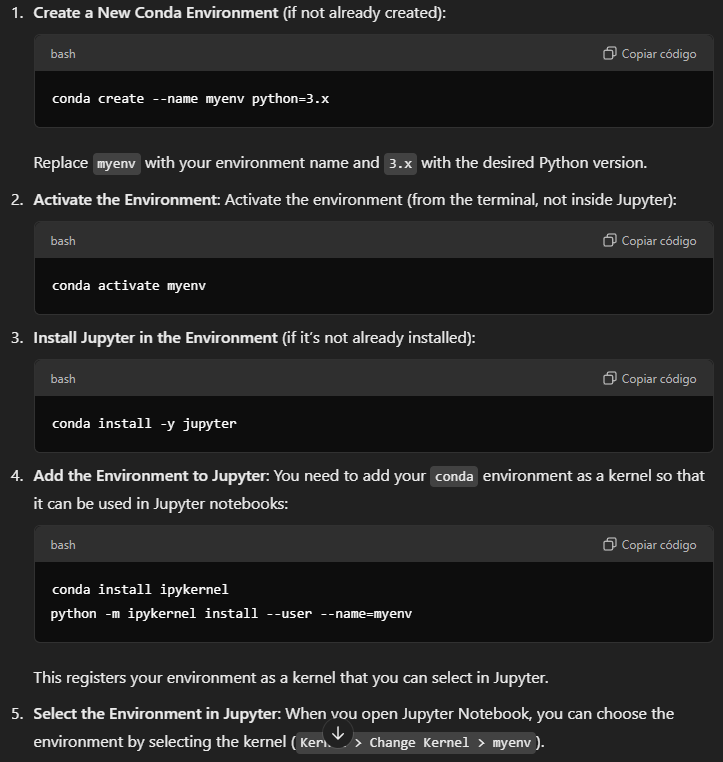

# file and directory access

There are a lot of modules related to this

https://docs.python.org/3/library/filesys.html

Built-in function open() - The standard way to open files for reading and writing.

https://docs.python.org/3/library/functions.html#open

print the working directory

In [ ]:
pwd

In [ ]:
import os

os - Operating system interfaces, including functions to work with files at a lower level than Python file objects.

https://docs.python.org/3/library/os.html#module-os

In [ ]:
help(dir)

In [ ]:
dir(os)

In [ ]:
os.getcwd()

In [ ]:
# TODO - there's a lot of useful things it can be used for. Ask ChatGPT

In [ ]:
import shutil

shutil — High-level file operations

https://docs.python.org/3/library/shutil.html

a path on Windows looks like

`C:\Users\user_name\projectx\datasets\file.txt`

on a Mac or Linux, looks like

`/home/user_name/projectx/datasets/file.txt`

that is, Windows machines use backslashes `\` in paths, while Macs/Linux use forward slashes `/`. 

eg. automatic file sorter in file explorer - create a folder for each file extension and place the files in the corresponding folder

In [ ]:
path_abs = r"D:\repos\python-jupyter\automatic-file-sorter" # absolute path, using a raw string
path_abs

Both string and bytes literals may optionally be prefixed with a letter `'r'` or `'R'`; such constructs are called raw string literals and raw bytes literals respectively and treat backslashes as literal characters. As a result, in raw string literals, `'\U'` and `'\u'` escapes are not treated specially.

In [ ]:
os.listdir(path_abs)

for portability, it's better to use forward slashes and relative paths in the code

In [ ]:
os.listdir('.') # working directory

In [ ]:
path_rel = './automatic-file-sorter' # relative path
path_rel

In [ ]:
os.listdir(path_rel)

In [ ]:
os.path.exists(path_rel + 'some_folder_name') # check if a folder or path exists

In [ ]:
folder_names = ['csv files', 'image files', 'gif files', 'text files']

for e in folder_names:
    if not os.path.exists(path_rel + '/' + e):
        os.mkdir(path_rel + '/' + e)

In [ ]:
os.listdir(path_rel)

In [ ]:
filenames = os.listdir(path_rel)

for filename in filenames:
    if '.txt' in filename:
        # move from initial path to new path
        shutil.move(path_rel + '/' + filename, path_rel + '/' + 'text files' + '/' + filename)
    elif '.csv' in filename:
        shutil.move(path_rel + '/' + filename, path_rel + '/' + 'csv files' + '/' + filename)
    elif '.jpeg' in filename or '.png' in filename:
        shutil.move(path_rel + '/' + filename, path_rel + '/' + 'image files' + '/' + filename)
    elif '.gif' in filename:
        shutil.move(path_rel + '/' + filename, path_rel + '/' + 'gif files' + '/' + filename)

In [ ]:
os.listdir(path_rel)

# regular expressions

**re** — Regular expression operations

https://docs.python.org/3/library/re.html

In [183]:
import re

In [184]:
text = "Hello!\n  World... \n \r ssssss"

In [185]:
# Split the text into a list of sentences using regex
sentences = re.split(r'(?<=[.!?])\s+', text)
sentences

['Hello!', 'World...', 'ssssss']